In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

import pickle

%matplotlib inline

In [2]:
np.random.seed(1) # seed
df_train = pd.read_csv("./datasets/mnist_sign_language_dataset/sign_mnist_train/sign_mnist_train.csv")
df_test = pd.read_csv("./datasets/mnist_sign_language_dataset/sign_mnist_test/sign_mnist_test.csv")

In [3]:
mnist_sign_language_x_train = np.asarray(df_train.iloc[:, 1:]).reshape((df_train.shape[0], 28, 28))
mnist_sign_language_y_train = np.asarray(df_train.iloc[:, 0]).reshape(df_train.shape[0])
mnist_sign_language_x_test = np.asarray(df_test.iloc[:, 1:]).reshape((df_test.shape[0], 28, 28))
mnist_sign_language_y_test = np.asarray(df_test.iloc[:, 0]).reshape(df_test.shape[0])

In [4]:
mnist_sign_language_x_int = np.concatenate((mnist_sign_language_x_test, mnist_sign_language_x_train))
mnist_sign_language_y = np.concatenate((mnist_sign_language_y_test, mnist_sign_language_y_train))

In [5]:
print("Mnist dataset shape of features: ", mnist_sign_language_x_int.shape)
print("Mnist dataset shape of labels: ", mnist_sign_language_y.shape)

print("Maximal pixel value in the MNIST dataset: ", np.max(mnist_sign_language_x_int))
print("Minimal pixel value in the MNIST dataset: ", np.min(mnist_sign_language_x_int))

# Thus we need to reshape it to [0, 1], just like the digits dataset
mnist_sign_language_x = np.zeros_like(mnist_sign_language_x_int, dtype = "float")
for i in range(len(mnist_sign_language_x)):
    mnist_sign_language_x[i] = np.true_divide(mnist_sign_language_x_int[i], 255.)
print("Maximal pixel value in the MNIST dataset after scaling: ", np.max(mnist_sign_language_x))
print("Minimal pixel value in the MNIST dataset after scaling: ", np.min(mnist_sign_language_x))

Mnist dataset shape of features:  (34627, 28, 28)
Mnist dataset shape of labels:  (34627,)
Maximal pixel value in the MNIST dataset:  255
Minimal pixel value in the MNIST dataset:  0
Maximal pixel value in the MNIST dataset after scaling:  1.0
Minimal pixel value in the MNIST dataset after scaling:  0.0


In [6]:
mnist_sign_language_x[0,0,:]

array([0.58431373, 0.58431373, 0.58823529, 0.58823529, 0.58823529,
       0.59215686, 0.59215686, 0.58823529, 0.59215686, 0.59607843,
       0.59607843, 0.59607843, 0.59607843, 0.59607843, 0.6       ,
       0.6       , 0.59215686, 0.59607843, 0.59607843, 0.6       ,
       0.59607843, 0.59607843, 0.59215686, 0.59215686, 0.58823529,
       0.58823529, 0.58823529, 0.58431373])

In [7]:
'''
Mapping from Labels to actual Gestures
note that classes 9: "J" and 25: "Z" are missing, since they require a motion.
'''
Gesture_Labels = {
  0: "A",
  1: "B",
  2: "C",
  3: "D",
  4: "E",
  5: "F",
  6: "G",
  7: "H",
  8: "I",
  10: "K",
  11: "L",
  12: "M",
  13: "N",
  14: "O",
  15: "P",
  16: "Q",
  17: "R",
  18: "S",
  19: "T",
  20: "U",
  21: "V",
  22: "W",
  23: "X",
  24: "Y",
  25: "0",
  26: "1",
  27: "2",
  28: "3",
  29: "4",
  30: "5",
  31: "6",
  32: "7",
  33: "8",
  34: "9"
}
print(Gesture_Labels)
print("Number of classes: ", len(Gesture_Labels))
Gesture_Labels[1]

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: '0', 26: '1', 27: '2', 28: '3', 29: '4', 30: '5', 31: '6', 32: '7', 33: '8', 34: '9'}
Number of classes:  34


'B'

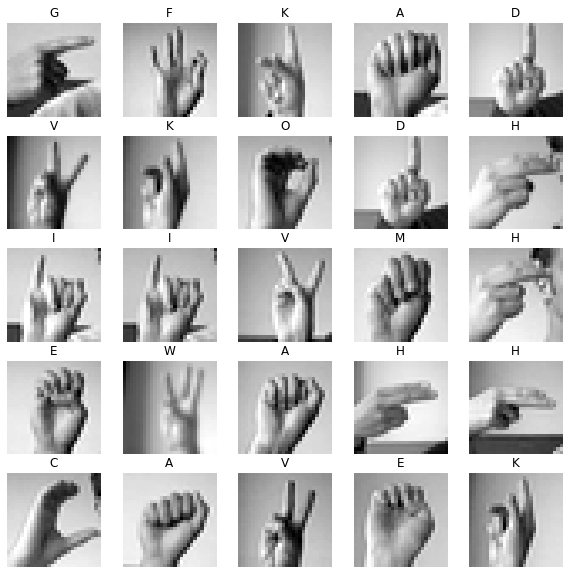

In [8]:
fig, ax = plt.subplots(5,5, figsize = (10, 10))

for i in range(5):
    for j in range(5):
        ax[i, j].imshow(mnist_sign_language_x[i*5+j,:,:], cmap = "gray")
        ax[i, j].set_title(Gesture_Labels[mnist_sign_language_y[i*5+j]])
        ax[i, j].axis("off")
        
plt.show()

In [9]:
digits_sign_language_x = np.load('./datasets/Sign_language_digits_dataset/X.npy')
digits_sign_language_y = np.load('./datasets/Sign_language_digits_dataset/Y.npy')

In [10]:
from scipy.interpolate import interp2d

'''
Resizing - Changing image size of the digits dataset from (64, 64) to (28, 28) to merge datasets.
''' 
def assigning(x):
    return np.linspace(0, 1, x)

width, height = digits_sign_language_x[0,:,:].shape
new_width, new_height = (28,28)

digits_sign_language_x3 = np.zeros((digits_sign_language_x.shape[0], new_width, new_height))

for i in range(digits_sign_language_x.shape[0]):
    image = digits_sign_language_x[i, :, :]
    interpolate_pixel = interp2d(assigning(width), assigning(height), image, kind="linear")
    new_image = interpolate_pixel(assigning(new_width), assigning(new_height))
    
    digits_sign_language_x3[i, :, :] = new_image

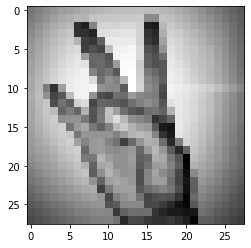

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
plt.imshow(digits_sign_language_x3[500,:,:], cmap = "gray")
plt.show()
print(digits_sign_language_y[500])

In [12]:
'''
Digit Dataset Labels
Index - Number
0 - 9
1 - 0
2 - 7
3 - 6
4 - 1
5 - 8
6 - 4
7 - 3
8 - 2
9 - 5
'''

'\nDigit Dataset Labels\nIndex - Number\n0 - 9\n1 - 0\n2 - 7\n3 - 6\n4 - 1\n5 - 8\n6 - 4\n7 - 3\n8 - 2\n9 - 5\n'

In [13]:
igits_sign_language_x2 = digits_sign_language_x
digits_sign_language_y2 = np.zeros(digits_sign_language_y.shape[0], dtype = "int")
print("digits_sign_language_y2 shape: ", digits_sign_language_y2.shape)

digits_sign_language_y2 shape:  (2062,)


In [14]:
'''
 changing label y from one hot encoding to integers
'''
for i in range(digits_sign_language_y.shape[0]):
    for j in range(digits_sign_language_y.shape[1]):
        if digits_sign_language_y[i, j] == 1.:
            if j == 0:
                digits_sign_language_y2[i] = 34
            if j == 1:
                digits_sign_language_y2[i] = 25
            if j == 2:
                digits_sign_language_y2[i] = 32
            if j == 3:
                digits_sign_language_y2[i] = 31
            if j == 4:
                digits_sign_language_y2[i] = 26
            if j == 5:
                digits_sign_language_y2[i] = 33
            if j == 6:
                digits_sign_language_y2[i] = 29
            if j == 7:
                digits_sign_language_y2[i] = 28
            if j == 8:
                digits_sign_language_y2[i] = 27
            if j == 9:
                digits_sign_language_y2[i] = 30
            

In [15]:
'''
merging dataset x
'''
our_dataset_x = np.concatenate((digits_sign_language_x3, mnist_sign_language_x))
our_dataset_x.shape

(36689, 28, 28)

In [16]:
'''
merging dataset y
'''
our_dataset_y = np.concatenate((digits_sign_language_y2, mnist_sign_language_y))
print(our_dataset_y.shape)
our_dataset_y = np.concatenate((digits_sign_language_y2, mnist_sign_language_y))
print(our_dataset_y.shape)

(36689,)
(36689,)


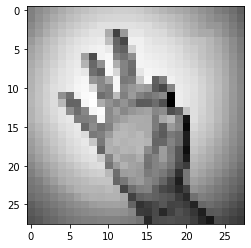

34


In [17]:
plt.imshow(our_dataset_x[2,:,:], cmap = "gray")
plt.show()
print(our_dataset_y[2])

In [18]:
'''
 shuffling the whole dataset
'''
rng_state = np.random.get_state()
np.random.shuffle(our_dataset_x)
np.random.set_state(rng_state)
np.random.shuffle(our_dataset_y)

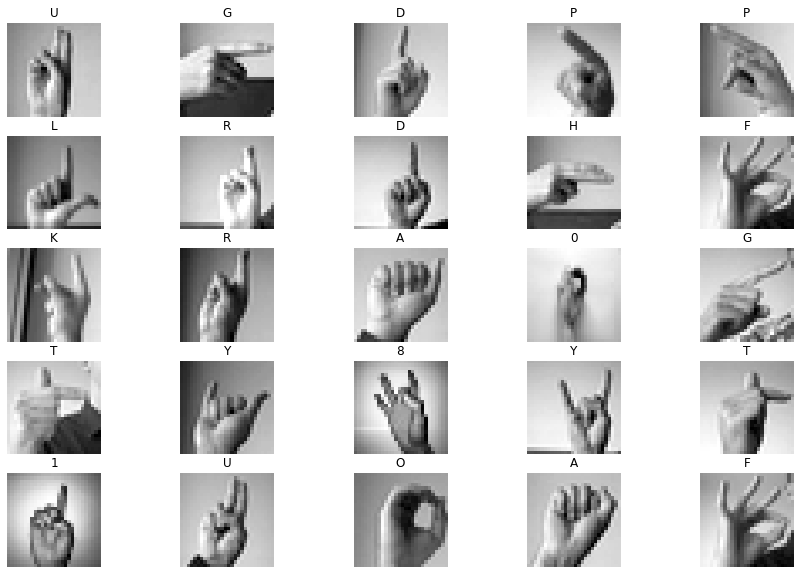

In [19]:
fig, ax = plt.subplots(5,5, figsize = (15, 10))
margin = 1840
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(our_dataset_x[margin + i*5+j,:,:], cmap = "gray")
        ax[i, j].set_title(Gesture_Labels[our_dataset_y[margin + i*5+j]])
        ax[i, j].axis("off")
        
plt.show()


In [20]:
our_dataset_train_x = our_dataset_x[:30000]
our_dataset_test_x = our_dataset_x[30000:36600]
our_dataset_train_y = our_dataset_y[:30000]
our_dataset_test_y = our_dataset_y[30000:36600]

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

from tqdm import tqdm

In [22]:
train_X = torch.from_numpy(our_dataset_train_x)
train_Y = torch.from_numpy(our_dataset_train_y)
test_X = torch.from_numpy(our_dataset_test_x)
test_Y = torch.from_numpy(our_dataset_test_y)

print("X train: ", train_X.shape)
print(type(train_X))
print("Y train: ", train_Y.shape)
print(type(train_Y))
print("X test: ", test_X.shape)
print(type(test_X))
print("Y test: ", test_Y.shape)
print(type(test_Y))

X train:  torch.Size([30000, 28, 28])
<class 'torch.Tensor'>
Y train:  torch.Size([30000])
<class 'torch.Tensor'>
X test:  torch.Size([6600, 28, 28])
<class 'torch.Tensor'>
Y test:  torch.Size([6600])
<class 'torch.Tensor'>


In [23]:
'''
New Data Version for New Model Version
'''
train_X1 = train_X
print("train_X1 shape: ", train_X1.shape)
test_X1 = test_X
print("test_X1 shape: ", test_X1.shape)

print(train_Y.shape)
print(len(train_Y))
im = train_X1[0]
print(im.shape, train_Y[0])

train_X1 shape:  torch.Size([30000, 28, 28])
test_X1 shape:  torch.Size([6600, 28, 28])
torch.Size([30000])
30000
torch.Size([28, 28]) tensor(29)


In [24]:
def batch_accuracy(prediction, label):
    return 100 * torch.mean((prediction == label).float())

def class_label(prediction):
    return torch.argmax(nn.functional.softmax(prediction, dim=0), dim=1)


In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [26]:
'''
Meta Parameters
'''
number_epochs = 50
batch_size = 200
learning_rate = 1e-3

In [27]:
'''
New Model Version
'''
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        
        # choose padding 2 to keep 28x28 size
        self.co1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
        self.pd1 = nn.ReplicationPad2d(2)
        self.mp1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.bn1 = nn.BatchNorm2d(num_features=32)
        self.co2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 1, padding = 1)
        self.mp2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.bn2 = nn.BatchNorm2d(num_features=64)
        self.co3 = nn.Conv2d(in_channels = 64, out_channels = 256, kernel_size = 3, stride = 1, padding = 1)
        self.mp3 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.bn3 = nn.BatchNorm2d(num_features=256)
        self.co4 = nn.Conv2d(in_channels = 256, out_channels = 1024, kernel_size = 3, stride = 1, padding = 1)
        self.mp4 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.bn4 = nn.BatchNorm2d(num_features=1024)
        self.fc1 = nn.Linear(in_features = 4096, out_features = 35)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = x.view(batch_size, 1, 28, 28)
        out = self.co1(x)
        out = self.pd1(out)
        out = self.mp1(out)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.co2(out)
        out = self.mp2(out)
        out = self.bn2(out)
        out = self.relu(out)
        out = self.co3(out)
        out = self.mp3(out)
        out = self.bn3(out)
        out = self.relu(out)
        out = self.co4(out)
        out = self.mp4(out)
        out = self.bn4(out)
        out = self.relu(out)
        out = out.view(batch_size, -1)
        out = self.fc1(out)
        
        return out

In [28]:
def train(use_gpu = False):
    
    P = Net()
    P.train()
    
    print('Loading Data...')
    print('Done Loading Data!')

    Data_X = DataLoader(train_X1, batch_size = batch_size)
    Data_Y = DataLoader(train_Y, batch_size = batch_size)
    testData_X = DataLoader(test_X1, batch_size = batch_size)
    testData_Y = DataLoader(test_Y, batch_size = batch_size)


    optimizer =  torch.optim.SGD(P.parameters(), lr= learning_rate)

    criterion =  nn.CrossEntropyLoss()
    
    print('Starting Training')
    for epoch in range(number_epochs):
        print('Epoch #{}'.format(epoch))
        for step, [example, label] in enumerate(zip(Data_X,Data_Y)): 

            optimizer.zero_grad()
            
            prediction = P(example.float())
            
            loss = criterion(prediction, label)
            loss.backward()
            optimizer.step()            

        # Now validate on the whole test set
        accuracies = []
        for idx, [test_ex, test_l] in enumerate(zip(testData_X,testData_Y)):
            prediction = P(test_ex.float())
            accuracies += [batch_accuracy(class_label(prediction), test_l).numpy()]

            # Using your batch_accuracy function, also print the mean accuracy
            # over the whole test split of the data.

        print('Validation Accuracy: {}%'.format(np.mean(accuracies)))
      
    print('Finished Training')
    return P

In [29]:
P = train()

Loading Data...
Done Loading Data!
Starting Training
Epoch #0
Validation Accuracy: 37.48484802246094%
Epoch #1
Validation Accuracy: 50.16666793823242%
Epoch #2
Validation Accuracy: 58.42424392700195%
Epoch #3
Validation Accuracy: 64.1212158203125%
Epoch #4
Validation Accuracy: 68.68181610107422%
Epoch #5
Validation Accuracy: 72.09091186523438%
Epoch #6
Validation Accuracy: 75.2727279663086%
Epoch #7
Validation Accuracy: 77.93939208984375%
Epoch #8
Validation Accuracy: 79.48484802246094%
Epoch #9
Validation Accuracy: 81.1515121459961%
Epoch #10
Validation Accuracy: 82.6515121459961%
Epoch #11
Validation Accuracy: 83.8787841796875%
Epoch #12
Validation Accuracy: 84.60606384277344%
Epoch #13
Validation Accuracy: 85.31818389892578%
Epoch #14
Validation Accuracy: 86.03030395507812%
Epoch #15
Validation Accuracy: 86.56060791015625%
Epoch #16
Validation Accuracy: 87.06060791015625%
Epoch #17
Validation Accuracy: 87.5%
Epoch #18
Validation Accuracy: 87.93939208984375%
Epoch #19
Validation Accu

In [31]:
PATH = './sign_language.pth'
torch.save(Net(), PATH)

In [32]:
model = torch.load(PATH)
model.eval()

Net(
  (co1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pd1): ReplicationPad2d((2, 2, 2, 2))
  (mp1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (co2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (mp2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (co3): Conv2d(64, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (mp3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (co4): Conv2d(256, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (mp4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn4): BatchNorm2d(1024, eps=1e-05, momentum=0